In [1]:
from pyspots.data import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# and import from the pyspots library
from pyspots.fit import init_default_avrami_model, avrami_func, do_fit
from pyspots.vis import plot_fit_against_full_dataset


In [2]:
normed = data.spots90FQ2_normalized_spot

In [3]:
y, t = normed[0].data, normed[0].times

In [4]:
s = pd.Series(y)
s = pd.rolling_mean(s, window=3).values[2:]
t = pd.Series(t)
t = pd.rolling_mean(t, window=3).values[2:]

In [5]:
y0 = np.average(s[:5])
y1 = np.average(s[-5:])
normed = (s - y0) / (y1 - y0)

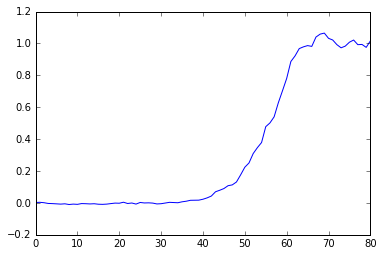

In [6]:
plt.plot(normed)

In [7]:
model.fit?

Object `model.fit` not found.


In [8]:
fits = do_fit(t, normed)

difference between 0.0393545216605 and 0.0551183505864 is -0.400559535747
difference between 34.8350439326 and 40.0647986778 is -0.150129127302
difference between 3 and 3 is 0.0
difference between 0.0393544162197 and 0.0393545216605 is -2.67926179037e-06
difference between 34.8349957756 and 34.8350439326 is -1.38243261285e-06
difference between 3 and 3 is 0.0


{'kA': 0.055118350586359055, 't0': 40.064798677769851, 'n': 3}
{'kA': 0.039354521660490915, 't0': 34.83504393263371, 'n': 3}
{'kA': 0.039354416219707256, 't0': 34.834995775599481, 'n': 3}


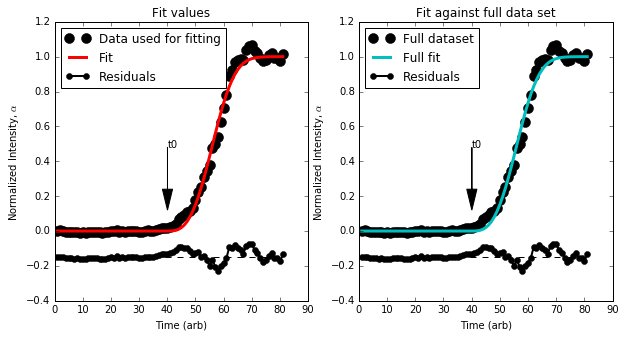

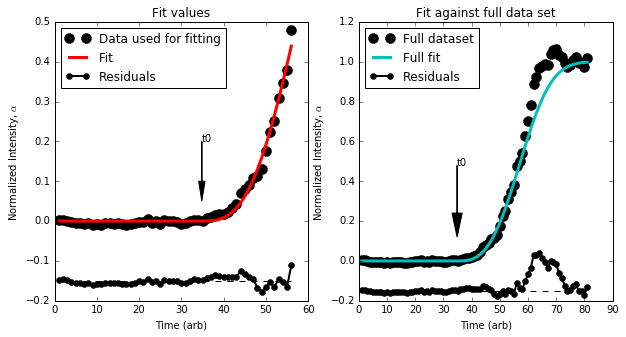

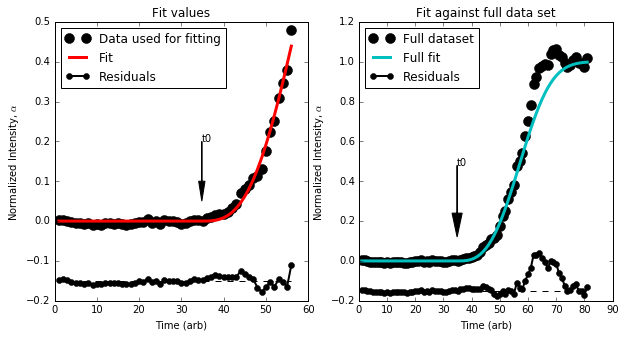

In [9]:
for fit in fits:
    fig, axes = plt.subplots(ncols=2, figsize=(10,5))
    plot_fit_against_full_dataset(axes, t, normed, fit)
    print(fit.best_values)